<h2> Intro to Financial Engineering Project </h2>




## Dependancies

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import cvxpy as cp
from scipy.optimize import minimize
import statsmodels.api as sm
from statsmodels import regression

## Part 1: Pick any 10 risky assets from the market. Use their 3 month closing price to obtain simple returns.

In [ ]:
# Define the ticker symbols for the 10 stocks
stocks = ['TCS.NS', 'WIPRO.NS', 'INFY.NS', 'HDFC.NS', 'ICICIBANK.NS', 'TATAMOTORS.NS', 'ITC.NS', 'TATAPOWER.NS', 'VEDL.NS', 'LT.NS']

# Define the start and end date for the data download (last 3 months)
start_date = pd.Timestamp(year=2019, month = 10, day = 1)
# start_date = pd.Timestamp(year=2019, month = 12, day = 31) - pd.Timedelta(days=90)
end_date = pd.Timestamp(year=2019, month = 12, day = 31)

# Download the closing prices for the tickers and store in a pandas DataFrame
df = yf.download(stocks, start=start_date, end=end_date)['Close']

# Calculate the simple returns for each stock
returns = df.pct_change().dropna()

[*********************100%***********************]  10 of 10 completed


In [ ]:
df

,HDFC.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,
2019-10-01,1995.650024,424.600006,793.549988,255.899994,1464.050049,115.300003,59.349998,2059.949951,151.300003,233.500000
2019-10-03,1974.550049,427.299988,785.599976,261.649994,1458.050049,122.400002,59.349998,2060.250000,144.399994,235.850006
2019-10-04,1978.300049,413.899994,793.450012,257.250000,1424.900024,119.650002,58.000000,2079.350098,143.300003,237.699997
2019-10-07,1969.300049,416.100006,789.549988,251.899994,1397.849976,117.500000,58.200001,2047.699951,142.649994,237.050003
2019-10-09,2002.000000,436.700012,783.650024,247.100006,1426.250000,120.900002,61.450001,2020.099976,145.699997,237.750000
2019-10-10,1987.949951,423.700012,783.049988,243.199997,1425.099976,116.800003,61.599998,2004.449951,141.149994,239.199997
2019-10-11,2010.150024,428.549988,814.799988,243.949997,1427.699951,121.300003,61.099998,1986.849976,147.050003,239.449997
2019-10-14,2014.750000,428.850006,786.099976,244.100006,1423.949951,127.849998,59.799999,2021.000000,147.800003,243.449997
2019-10-15,2013.300049,431.850006,768.299988,247.600006,1432.250000,126.949997,59.750000,2037.300049,153.500000,243.649994


In [ ]:
len(returns)

59

In [ ]:
returns

,HDFC.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,
2019-10-03,-0.010573,0.006359,-0.010018,0.022470,-0.004098,0.061578,0.000000,0.000146,-0.045605,0.010064
2019-10-04,0.001899,-0.031360,0.009992,-0.016816,-0.022736,-0.022467,-0.022746,0.009271,-0.007618,0.007844
2019-10-07,-0.004549,0.005315,-0.004915,-0.020797,-0.018984,-0.017969,0.003448,-0.015221,-0.004536,-0.002735
2019-10-09,0.016605,0.049507,-0.007473,-0.019055,0.020317,0.028936,0.055842,-0.013479,0.021381,0.002953
2019-10-10,-0.007018,-0.029769,-0.000766,-0.015783,-0.000806,-0.033912,0.002441,-0.007747,-0.031229,0.006099
2019-10-11,0.011167,0.011447,0.040547,0.003084,0.001824,0.038527,-0.008117,-0.008780,0.041800,0.001045
2019-10-14,0.002288,0.000700,-0.035223,0.000615,-0.002627,0.053998,-0.021277,0.017188,0.005100,0.016705
2019-10-15,-0.000720,0.006995,-0.022643,0.014338,0.005829,-0.007040,-0.000836,0.008065,0.038566,0.000822
2019-10-16,0.017583,0.007989,0.004100,-0.015953,-0.005621,-0.008665,-0.027615,0.004467,-0.023453,0.021547


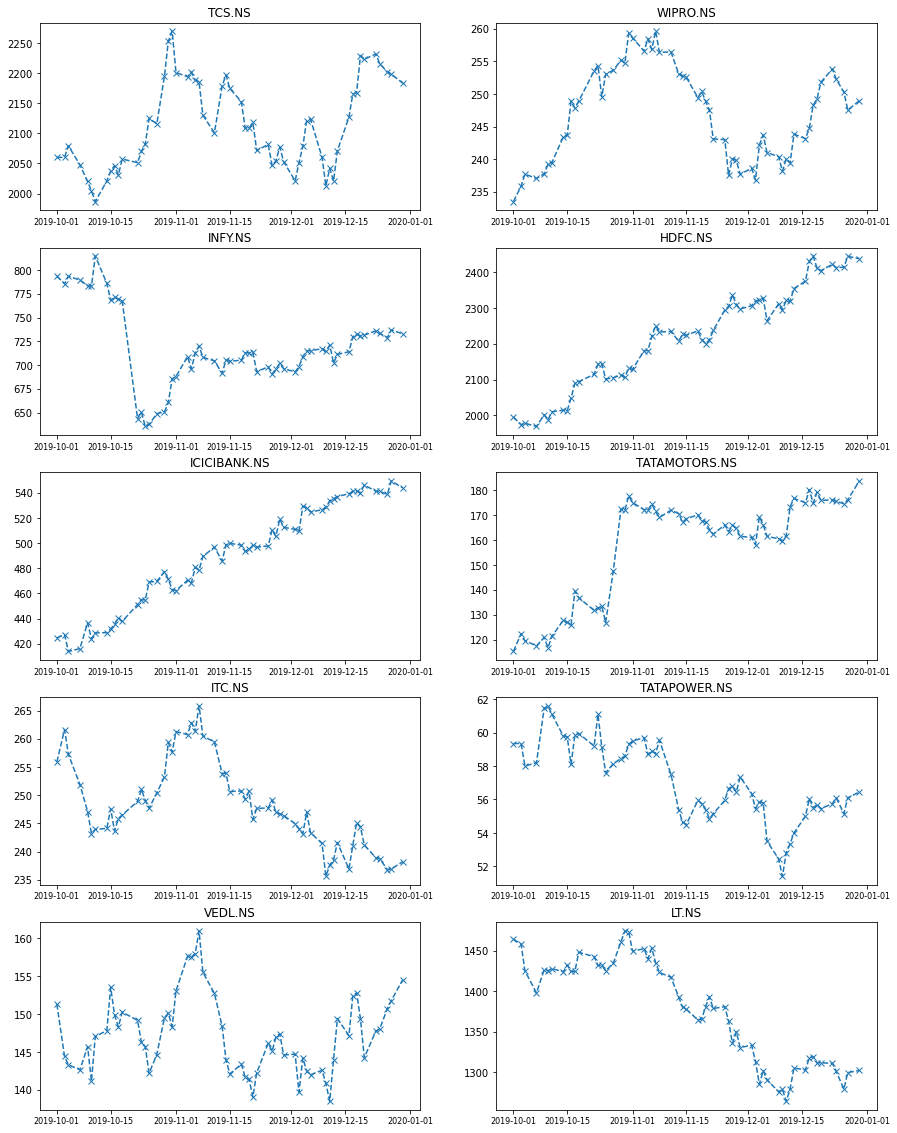

In [ ]:
# Plot the closing prices for each stock
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axs = axs.flatten()
for i, ticker in enumerate(stocks):
    axs[i].plot(df.index, df[ticker],linestyle='dashed',marker='x')
    axs[i].set_title(ticker)
    axs[i].xaxis.set_tick_params(labelsize=8)


plt.show()


### Plot the return of the prices


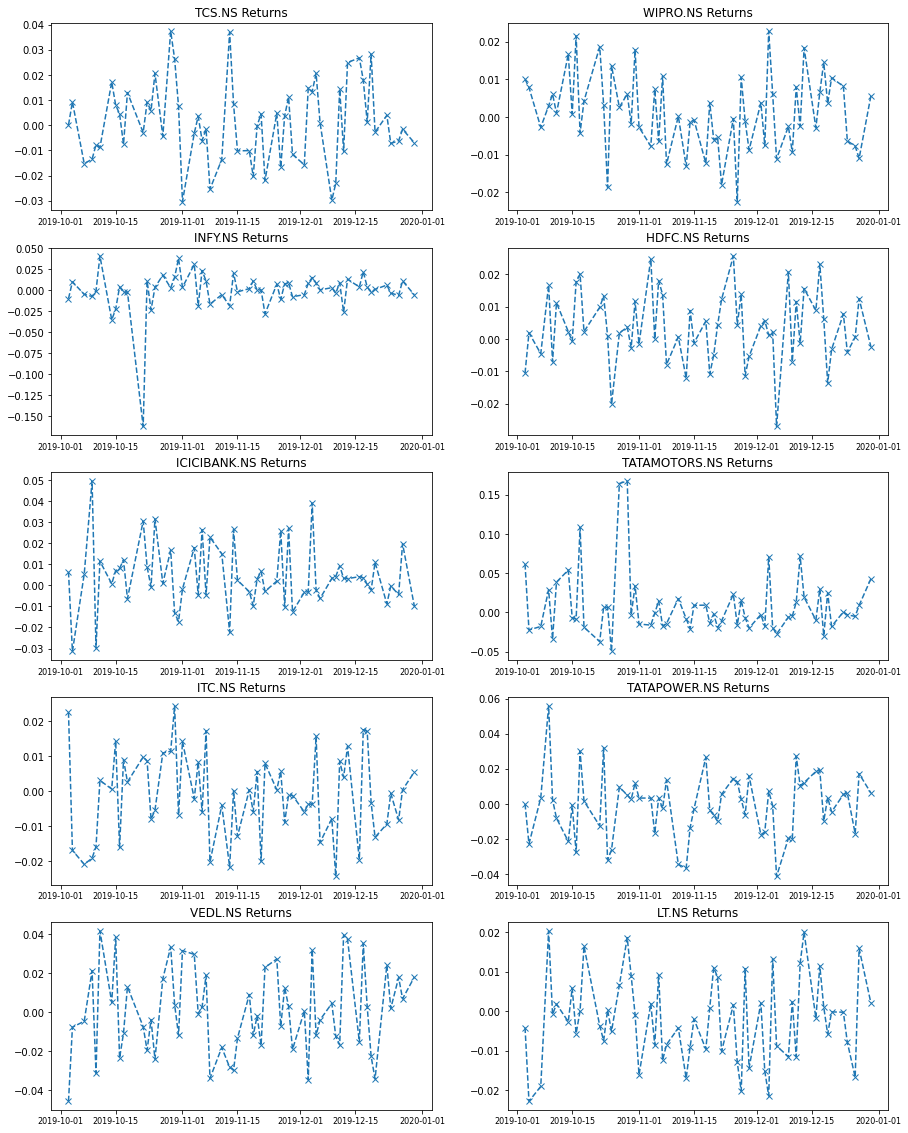

In [ ]:
# Plot the returns for each stock
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axs = axs.flatten()
for i, ticker in enumerate(stocks):
    axs[i].plot(returns.index, returns[ticker],linestyle='dashed',marker='x')
    axs[i].set_title(ticker + ' Returns')
    axs[i].xaxis.set_tick_params(labelsize=8)

plt.show()

## Part 2: Use the mean-variance theory and build the Markowitz efficient frontier.

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns) * 59
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(59)
    return portfolio_volatility, portfolio_return


def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_history = np.zeros((num_portfolios, len(mean_returns)))

    for i in range(num_portfolios):
        weights = np.random.dirichlet(np.ones(len(mean_returns)), size=1)
        weights_history[i] = weights
        portfolio_volatility, portfolio_return = portfolio_annualised_performance(weights[0], mean_returns, cov_matrix)
        results[0, i], results[1, i], results[2, i] = portfolio_volatility, portfolio_return, (portfolio_return - risk_free_rate) / portfolio_volatility

    return results, weights_history

In [ ]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 26000
risk_free_rate = 0.01

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
def get_info(mean_returns, cov_matrix, risk_free_rate):
    results, _ = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    max_sharpe, min_vol = optimize_portfolio(mean_returns, cov_matrix, risk_free_rate, 'max_sharpe_ratio'), optimize_portfolio(mean_returns, cov_matrix, risk_free_rate, 'min_variance')
    (sdp, rp), (sdp_min, rp_min) = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix), portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    max_sharpe_allocation, min_vol_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation']), pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation['allocation'], min_vol_allocation['allocation'] = np.round(max_sharpe_allocation['allocation'] * 100, 2), np.round(min_vol_allocation['allocation'] * 100, 2)    # max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation, min_vol_allocation = max_sharpe_allocation.T, min_vol_allocation.T
    return results, sdp, rp, sdp_min, rp_min, max_sharpe_allocation, min_vol_allocation

In [ ]:
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate, method='max_sharpe_ratio'):
    num_assets = len(mean_returns)
    assets = {'mean_returns': mean_returns, 'cov_matrix': cov_matrix, 'risk_free_rate': risk_free_rate}
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))

    if method == 'max_sharpe_ratio':
        result = minimize(neg_sharpe_ratio, num_assets * [1. / num_assets, ], method='SLSQP', args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

    elif method == 'min_variance':
        result = minimize(portfolio_volatility, num_assets * [1. / num_assets, ], method='SLSQP', args = (mean_returns, cov_matrix), bounds=bounds, constraints=constraints)

    else:
        raise ValueError("Unknown optimization method")

    return result

In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, risk_free_rate):
    results, sdp, rp, sdp_min, rp_min, max_sharpe_allocation, min_vol_allocation = get_info(mean_returns, cov_matrix, risk_free_rate)
    print("-"*80)
    print(f"Maximum Sharpe Ratio Portfolio Allocation \n\n Annualised Return: {round(rp,2)} \n\n Annualised Volatility: {round(sdp,2)} \n\n {max_sharpe_allocation}")
    print("-"*80)
    print(f"Minimum Volatility Portfolio Allocation \n\n Annualised Return: {round(rp_min,2)} \n\n Annualised Volatility: {round(sdp_min,2)} \n\n {min_vol_allocation}")

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='coolwarm', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation 

 Annualised Return: 0.22 

 Annualised Volatility: 0.07 

             HDFC.NS  ICICIBANK.NS  INFY.NS  ITC.NS  LT.NS  TATAMOTORS.NS  \
allocation    49.56         31.02      0.0     0.0    0.0           6.67   

            TATAPOWER.NS  TCS.NS  VEDL.NS  WIPRO.NS  
allocation           0.0    9.24      0.0      3.51  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation 

 Annualised Return: 0.06 

 Annualised Volatility: 0.05 

             HDFC.NS  ICICIBANK.NS  INFY.NS  ITC.NS  LT.NS  TATAMOTORS.NS  \
allocation     19.2         11.65     5.03    13.3  17.44            0.0   

            TATAPOWER.NS  TCS.NS  VEDL.NS  WIPRO.NS  
allocation           0.0    6.51      0.0     26.88  


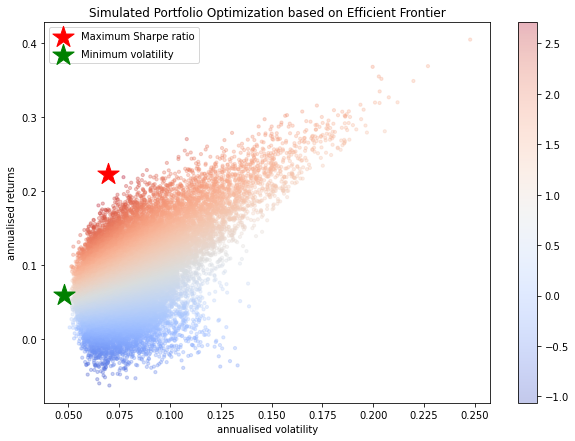

In [ ]:
display_simulated_ef_with_random(mean_returns, cov_matrix, risk_free_rate)

## Part 3: Use a risk-free asset along with the 10 risky assets to obtain CAP -M. Draw the straight line and show that it is tangent to the efficient frontier. Obtain the market portfolio.

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [ ]:
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate, method='max_sharpe_ratio'):
    num_assets = len(mean_returns)
    assets = {'mean_returns': mean_returns, 'cov_matrix': cov_matrix, 'risk_free_rate': risk_free_rate}
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))

    if method == 'max_sharpe_ratio':
        result = minimize(neg_sharpe_ratio, num_assets * [1. / num_assets, ], method='SLSQP', args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

    elif method == 'min_variance':
        result = minimize(portfolio_volatility, num_assets * [1. / num_assets, ], method='SLSQP', args = (mean_returns, cov_matrix), bounds=bounds, constraints=constraints)

    else:
        raise ValueError("Unknown optimization method")

    return result

In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, risk_free_rate):
    results, sdp, rp, sdp_min, rp_min, max_sharpe_allocation, min_vol_allocation = get_info(mean_returns, cov_matrix, risk_free_rate)
    print("-"*80)
    print(f"Maximum Sharpe Ratio Portfolio Allocation \n\n Annualised Return: {round(rp,2)} \n\n Annualised Volatility: {round(sdp,2)} \n\n {max_sharpe_allocation}")
    print("-"*80)
    print(f"Minimum Volatility Portfolio Allocation \n\n Annualised Return: {round(rp_min,2)} \n\n Annualised Volatility: {round(sdp_min,2)} \n\n {min_vol_allocation}")

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='coolwarm', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    x = [0, sdp]
    y = [risk_free_rate, rp]
    plt.plot(x,y, label = "Capital Market Line")
    plt.show()

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation 

 Annualised Return: 0.22 

 Annualised Volatility: 0.07 

             HDFC.NS  ICICIBANK.NS  INFY.NS  ITC.NS  LT.NS  TATAMOTORS.NS  \
allocation    49.56         31.02      0.0     0.0    0.0           6.67   

            TATAPOWER.NS  TCS.NS  VEDL.NS  WIPRO.NS  
allocation           0.0    9.24      0.0      3.51  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation 

 Annualised Return: 0.06 

 Annualised Volatility: 0.05 

             HDFC.NS  ICICIBANK.NS  INFY.NS  ITC.NS  LT.NS  TATAMOTORS.NS  \
allocation     19.2         11.65     5.03    13.3  17.44            0.0   

            TATAPOWER.NS  TCS.NS  VEDL.NS  WIPRO.NS  
allocation           0.0    6.51      0.0     26.88  


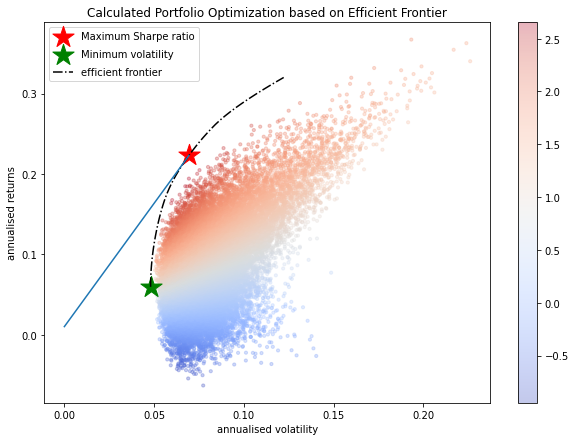

In [ ]:
display_calculated_ef_with_random(mean_returns, cov_matrix, risk_free_rate)

In [ ]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    an_vol, an_rt = np.std(returns) * np.sqrt(62), mean_returns * 62
    results, sdp, rp, sdp_min, rp_min, max_sharpe_allocation, min_vol_allocation = get_info(mean_returns, cov_matrix, risk_free_rate)
    print("-"*80)
    print(f"Maximum Sharpe Ratio Portfolio Allocation \n\n Annualised Return: {round(rp,2)} \n\n Annualised Volatility: {round(sdp,2)} \n\n {max_sharpe_allocation}")
    print("-"*80)
    print(f"Minimum Volatility Portfolio Allocation \n\n Annualised Return: {round(rp_min,2)} \n\n Annualised Volatility: {round(sdp_min,2)} \n\n {min_vol_allocation}")
    print("-"*80)
    print("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(df.columns):
        print(txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print("-"*80)

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol, an_rt, marker='o', s=200)

    for i, txt in enumerate(df.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')

    ax.scatter(sdp, rp, marker='*', color='r', s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.6, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black',
            label='Efficient Frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('Annualised Volatility')
    ax.set_ylabel('Annualised Returns')
    ax.legend(labelspacing=0.8)

    cml_x = [0, sdp]
    cml_y = [risk_free_rate, rp]
    plt.plot(cml_x, cml_y, label="Capital Market Line")

    plt.show()

    return sdp, rp

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation 

 Annualised Return: 0.22 

 Annualised Volatility: 0.07 

             HDFC.NS  ICICIBANK.NS  INFY.NS  ITC.NS  LT.NS  TATAMOTORS.NS  \
allocation    49.56         31.02      0.0     0.0    0.0           6.67   

            TATAPOWER.NS  TCS.NS  VEDL.NS  WIPRO.NS  
allocation           0.0    9.24      0.0      3.51  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation 

 Annualised Return: 0.06 

 Annualised Volatility: 0.05 

             HDFC.NS  ICICIBANK.NS  INFY.NS  ITC.NS  LT.NS  TATAMOTORS.NS  \
allocation     19.2         11.65     5.03    13.3  17.44            0.0   

            TATAPOWER.NS  TCS.NS  VEDL.NS  WIPRO.NS  
allocation           0.0    6.51      0.0     26.88  
--------------------------------------------------------------------------------
Individual Stock Returns and Vo

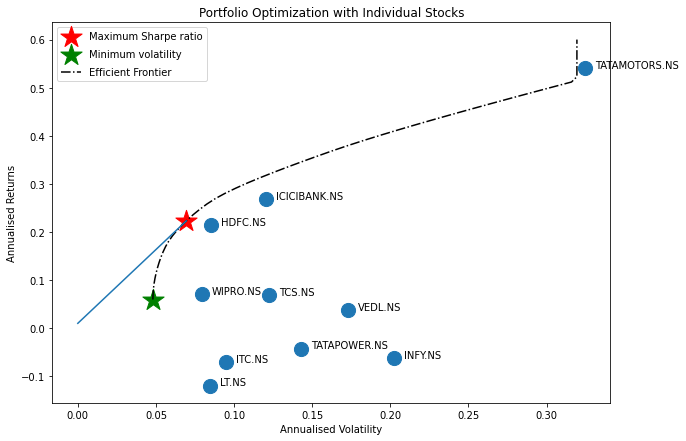

In [ ]:
optimal_risk, optimal_return = display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

## Part 4 : Security Market line (SML)

In [ ]:
portfolio = ['VEDL.NS', 'HDFC.NS', 'TATAMOTORS.NS']

In [ ]:
optimal_risk, optimal_return

(0.06941854985814579, 0.22297154603771727)

In [ ]:
risk_free_rate

0.01

In [ ]:
# Calculate the market return and risk
start_date = pd.Timestamp(year=2019, month = 9, day = 30)
# start_date = pd.Timestamp(year=2019, month = 12, day = 31) - pd.Timedelta(days=90)
end_date = pd.Timestamp(year=2019, month = 12, day = 31)

# Download the closing prices for the tickers and store in a pandas DataFrame
market_prices = yf.download('^NSEI', start=start_date, end=end_date)['Close']
# market_prices = yf.download('^NSEI', start='2019-10-01', end='2019-12-31')['Close']
market_returns = market_prices.pct_change().dropna()
market_return = np.mean(market_returns)
market_risk = np.std(market_returns)

[*********************100%***********************]  1 of 1 completed


In [ ]:
market_return

0.0011369284916201612

In [ ]:
market_prices

Date
2019-09-30    11474.450195
2019-10-01    11359.900391
2019-10-03    11314.000000
2019-10-04    11174.750000
2019-10-07    11126.400391
2019-10-09    11313.299805
2019-10-10    11234.549805
2019-10-11    11305.049805
2019-10-14    11341.150391
2019-10-15    11428.299805
2019-10-16    11464.000000
2019-10-17    11586.349609
2019-10-18    11661.849609
2019-10-22    11588.349609
2019-10-23    11604.099609
2019-10-24    11582.599609
2019-10-25    11583.900391
2019-10-29    11786.849609
2019-10-30    11844.099609
2019-10-31    11877.450195
2019-11-01    11890.599609
2019-11-04    11941.299805
2019-11-05    11917.200195
2019-11-06    11966.049805
2019-11-07    12012.049805
2019-11-08    11908.150391
2019-11-11    11913.450195
2019-11-13    11840.450195
2019-11-14    11872.099609
2019-11-15    11895.450195
2019-11-18    11884.500000
2019-11-19    11940.099609
2019-11-20    11999.099609
2019-11-21    11968.400391
2019-11-22    11914.400391
2019-11-25    12073.750000
2019-11-26    12037.700

In [ ]:
len(market_returns)

59

In [ ]:
# Regression model
X = market_returns.values
Y = returns[portfolio[0]].dropna().values

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)

In [ ]:
alpha, beta

(-0.0006617025445229118, 1.1059907947741299)

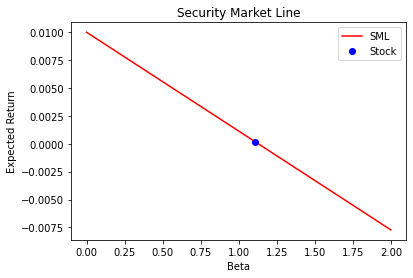

In [ ]:
# Define the beta of the stock
beta = beta

# Calculate the expected return of the stock using the CAPM formula
expected_return = risk_free_rate + beta * (market_return - risk_free_rate)

# Define a range of beta values to plot the SML
beta_range = np.linspace(0, 2, 100)

# Calculate the expected return for each beta value
sml = risk_free_rate + beta_range * (market_return - risk_free_rate)

# Plot the SML and the stock
plt.plot(beta_range, sml, 'r-', label='SML')
plt.plot(beta, expected_return, 'bo', label='Stock')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('Security Market Line')
plt.legend()
plt.show()

In [ ]:
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

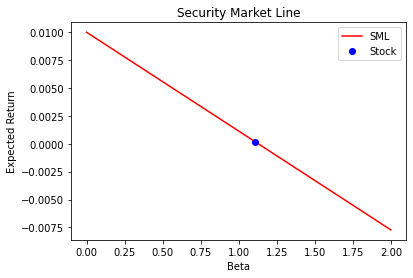

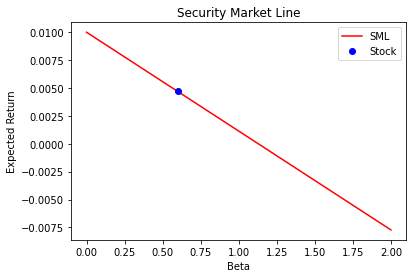

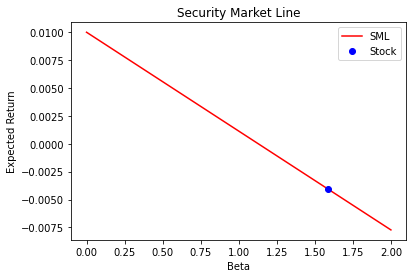

In [ ]:
X = market_returns.values

for i in range(len(portfolio)):
    Y = returns[portfolio[i]].dropna().values
    alpha, beta = linreg(X,Y)

    expected_return = risk_free_rate + beta * (market_return - risk_free_rate)

    # Define a range of beta values to plot the SML
    beta_range = np.linspace(0, 2, 100)

    # Calculate the expected return for each beta value
    sml = risk_free_rate + beta_range * (market_return - risk_free_rate)

    # Plot the SML and the stock
    plt.plot(beta_range, sml, 'r-', label='SML')
    plt.plot(beta, expected_return, 'bo', label='Stock')
    plt.xlabel('Beta')
    plt.ylabel('Expected Return')
    plt.title('Security Market Line')
    plt.legend()
    plt.show()

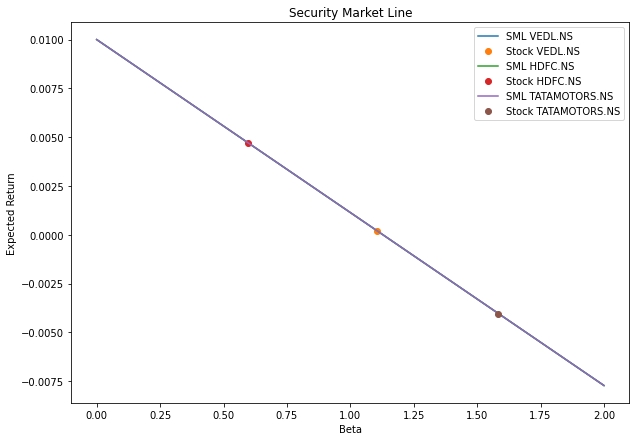

In [ ]:
X = market_returns.values
beta_range = np.linspace(0, 2, 100)
plt.figure(figsize=(10, 7))

for i in range(len(portfolio)):
    Y = returns[portfolio[i]].dropna().values
    alpha, beta = linreg(X, Y)
    expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
    sml = risk_free_rate + beta_range * (market_return - risk_free_rate)

    plt.plot(beta_range, sml, label=f'SML {portfolio[i]}')
    plt.plot(beta, expected_return, 'o', label=f'Stock {portfolio[i]}')

plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('Security Market Line')
plt.legend()
plt.show()


slope is -ve since market return is less than the risk free rate for our scenario


<h4> HDFC's stock has beta value less than 1 (around 0.5) that means it's less (almost 1/2th) volatile, as compared to the overall market. Moreover, its expected return is the highest, so among the three stocks, it is possibly the best option to consdier
<br>
but it also depends on other factors like companies financials, industry trends and competitive landscape</h4>

## Line of best fit

In [ ]:
# Regression model
# X = market_returns.values
Y = returns[portfolio[0]].dropna().values

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)

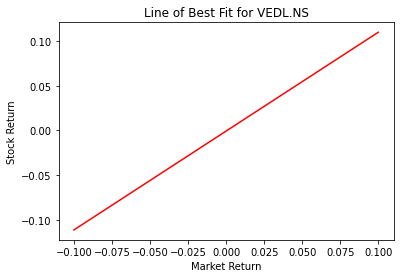

In [ ]:
# Define the alpha and beta values of the stock
alpha = alpha
beta = beta

# Define a range of market returns to plot the line of best fit
market_returns = np.linspace(-0.1, 0.1, 100)

# Calculate the expected return for each market return
expected_returns = alpha + beta * market_returns

# Plot the line of best fit
plt.plot(market_returns, expected_returns, 'r-', label='Line of Best Fit')
plt.title(f'Line of Best Fit for {portfolio[0]}')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')
plt.show()


In [ ]:
Y = returns[portfolio[1]].dropna().values
alpha, beta = linreg(X,Y)

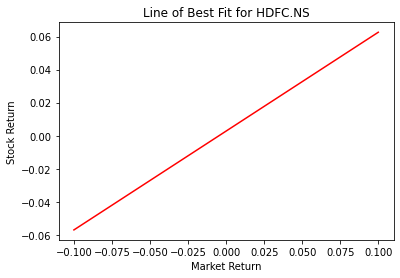

In [ ]:
# Define the alpha and beta values of the stock
alpha = alpha
beta = beta

# Define a range of market returns to plot the line of best fit
market_returns = np.linspace(-0.1, 0.1, 100)

# Calculate the expected return for each market return
expected_returns = alpha + beta * market_returns

# Plot the line of best fit
plt.plot(market_returns, expected_returns, 'r-', label='Line of Best Fit')
plt.title(f'Line of Best Fit for {portfolio[1]}')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')
plt.show()


In [ ]:
Y = returns[portfolio[2]].dropna().values
alpha, beta = linreg(X,Y)

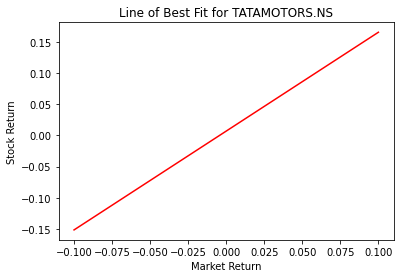

In [ ]:
# Define the alpha and beta values of the stock
alpha = alpha
beta = beta

# Define a range of market returns to plot the line of best fit
market_returns = np.linspace(-0.1, 0.1, 100)

# Calculate the expected return for each market return
expected_returns = alpha + beta * market_returns

# Plot the line of best fit
plt.plot(market_returns, expected_returns, 'r-', label='Line of Best Fit')
plt.title(f'Line of Best Fit for {portfolio[2]}')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')
plt.show()


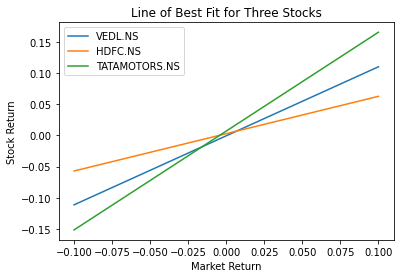

In [ ]:
alphas = []
betas = []
for i in range(len(portfolio)):
  Y = returns[portfolio[i]].dropna().values
  alpha, beta = linreg(X,Y)
  alphas.append(alpha)
  betas.append(beta)


# Plot the line of best fit for each stock on a single graph
for i in range(len(portfolio)):
    # Define the alpha and beta values for the stock
    alpha = alphas[i]
    beta = betas[i]

    # Calculate the expected return for each market return
    expected_returns = alpha + beta * market_returns

    # Plot the line of best fit
    plt.plot(market_returns, expected_returns, label=portfolio[i])

# Add a title and axis labels
plt.title('Line of Best Fit for Three Stocks')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()
